In [3]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
import string
import math
import numpy as np
import secrets
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os, os.path

In [4]:
BOOK_DIR = "./bnw"
PREFIX = "bnw_"
CLOUD_DIR = "./clouds"

In [5]:
def get_number_of_chapters(dir):
    return len([name for name in os.listdir(dir) if os.path.isfile(os.path.join(dir, name))])

def get_wordlist_from_file(filename):
    with open(filename) as f:
        words = f.read()
        return words

def get_wordlist_from_files(dir, prefix):
    nr_chapters = get_number_of_chapters(dir)
    words = ""
    for i in range(nr_chapters):
        words += get_wordlist_from_file(dir + f'/{prefix}{i+1}.txt')
    return words

def tokenize_words(words):
    return word_tokenize(words)

def translate_words(words):
    return words.translate(str.maketrans("", "",string.punctuation))

def lower_words(words):
    return [word.lower() for word in words]

def filter_stopwords(words):
    stopw = stopwords.words('english')
    return [word for word in words if not word in stopw]

def stem_words(words):
    ps = PorterStemmer() 
    return [ps.stem(word) for word in words]

def count_words(words):
    return Counter(words)


# Ex 5


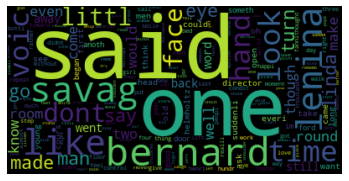

In [6]:
words = get_wordlist_from_files(BOOK_DIR, PREFIX)
words = translate_words(words)
words = tokenize_words(words)
words = lower_words(words)
words = filter_stopwords(words)
words = stem_words(words)
c_words = count_words(words)
wordcloud = WordCloud().generate_from_frequencies(c_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Ex 6


In [7]:
def compute_tf_idf(word, document, documents):
    tf = document.count(word)
    idf = compute_idf(word, documents)
    return tf * idf

def compute_idf(word, documents):
    apperances = sum([1 for document in documents if word in document])
    return math.log(len(documents) /  (1 + apperances))

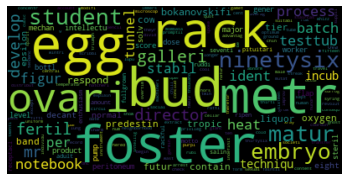

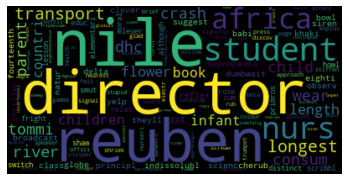

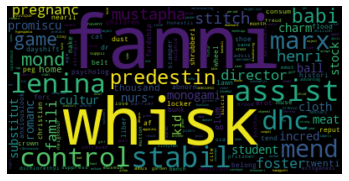

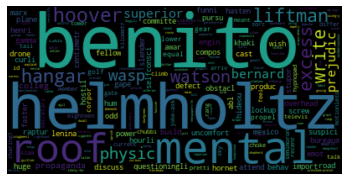

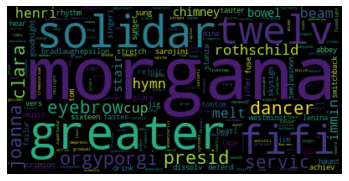

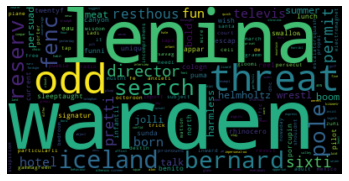

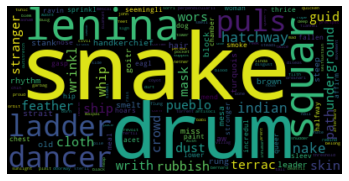

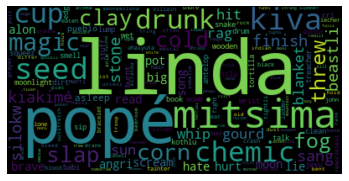

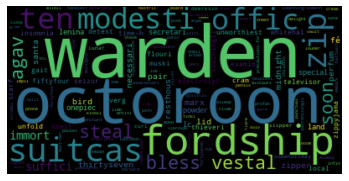

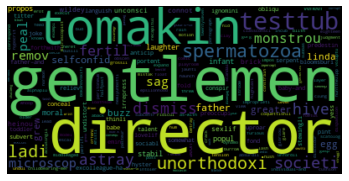

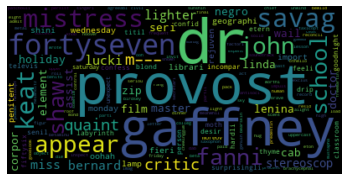

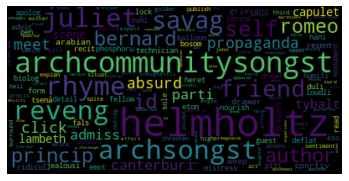

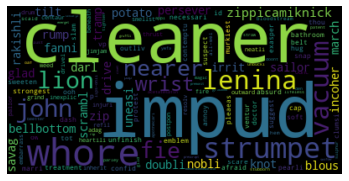

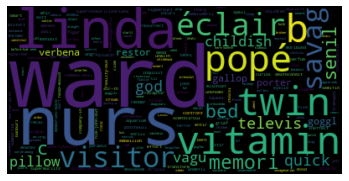

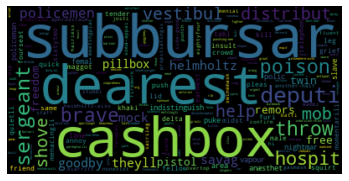

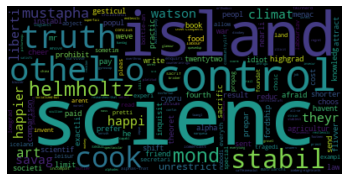

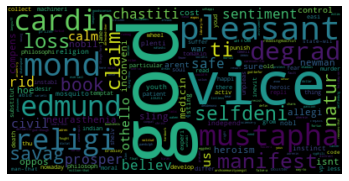

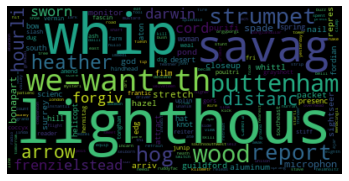

In [8]:
number_of_chapters = get_number_of_chapters(BOOK_DIR)
chapters = []
for i in range(number_of_chapters):
    chapter = get_wordlist_from_file(f'{BOOK_DIR}/{PREFIX}{i+1}.txt')
    chapter = translate_words(chapter)
    chapter = tokenize_words(chapter)
    chapter = lower_words(chapter)
    chapter = filter_stopwords(chapter)
    chapter = stem_words(chapter)
    chapters.append(chapter)

tf_idfs = [[(word, compute_tf_idf(word, chapter, chapters)) for word in set(chapter)] for chapter in chapters]
tf_idfs = [dict(chapter) for chapter in tf_idfs]

for i, tfs in enumerate(tf_idfs):
    wordcloud = WordCloud().generate_from_frequencies(tfs)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
#     plt.savefig(f'{CLOUD_DIR}/{PREFIX}{i+1}.jpg')
    plt.show()


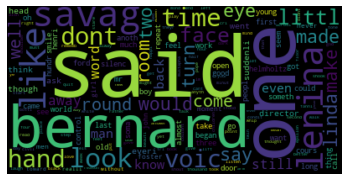

In [22]:
book_tf_idfs  = dict([(word, compute_tf_idf(word, words, words)) for word in set(words)])
wordcloud = WordCloud().generate_from_frequencies(book_tf_idfs)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Ex 7

In [10]:
def sort_by_tf_idf(word, chapters):
    tf_idfs = [(i + 1, compute_tf_idf(word,chapter,chapters)) for i, chapter in enumerate(chapters) ]
    return sorted(tf_idfs, key=lambda tup: tup[1], reverse=True)

In [26]:
print(sort_by_tf_idf("savag", chapters))

[(18, 16.921964822600653), (11, 9.111827212169583), (12, 8.1355600108657), (14, 6.183025608257931), (17, 6.183025608257931), (15, 5.857603207823303), (16, 5.857603207823303), (13, 4.230491205650163), (6, 3.2542240043462796), (3, 1.3016896017385118), (8, 1.3016896017385118), (7, 0.32542240043462795), (1, 0.0), (2, 0.0), (4, 0.0), (5, 0.0), (9, 0.0), (10, 0.0)]


# Ex 8

In [12]:
def create_sentence(word, size, occurences):
    sentence = word
    next_w = word
    for _ in range(size):
        next_w = secrets.choice(occurences[next_w])[0]
        sentence += f' {next_w}'
    return sentence

In [29]:
words_set = set(words)
words_np = np.array(words)
occurences = dict([(word, np.where(words_np == word)[0]) for word in words_set])
for a in occurences:
    occurences[a] = [words[i + 1] for i in occurences[a] if i < len(words) - 1]
    occurences[a] = count_words(occurences[a])
    occurences[a] = occurences[a].most_common(5)
print(create_sentence("savag", 25, occurences))

savag would never learn scienc fell crash dare boy think said director open order thing like drum beat yet fertil bokanovskify–in word suddenli lenina crown nice
